# Comparing means, Student's t-test, ANOVA
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

In this Notebook, we will examine the concept of comparing means between groups of data using Student's t-test and ANOVA.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

## High-school class I.Q. test

A principal at a certain school claims that the students in his school are above average intelligence. A random sample of 30 students have a mean score of 112.5. **Is there sufficient evidence to support the principal’s claim**? The mean population IQ is 100 with a standard deviation of 15.

Note, although this problem does not sound like an example of comparing group means, it is indeed the same. Instead of comparing two sample datasets, we are comparing one sample dataset to the population mean.

Some additional questions can also be asked to understand the impact of various quantities involved,

- What happens to our conclusion if the population mean is higher, say 107?
- What happens to our conclusion if the population standard deviation is lower, say 10? What happens if it is higher instead?
- What happens if there were only 4 high-school students who could be tested for the I.Q.? What if we could test 100 students instead?
- What is the impact of changing the significance level to 0.01 from 0.05?


### Given data

In [2]:
population_mean = 100
population_std = 15
n_sample = 30

### Generate typical distribution of a high-school class
This will be considered an 'average' class i.e. not having above-average intelligence as the principal claims.

In [3]:
avg_class = np.vectorize(int)(np.random.normal(loc=population_mean,scale=population_std,size=n_sample))

In [4]:
print("A typical class I.Q.:",avg_class)

A typical class I.Q.: [106  96 110  97  89 109 116 100  98  89 120  91  92 105  85 107  78  95
 111  87 106  81 108 119  97 139  83  94  94  91]


### The given class data (generated with the given mean and assumed same variance as population)

In [5]:
given_class = np.vectorize(int)(np.random.normal(loc=112.5,scale=population_std,size=n_sample))

In [6]:
print("Given class I.Q.:",given_class)

Given class I.Q.: [125 118 129  70 112 112 141 116 102  88 106 147 121 111  94 124  93 125
 104 129 122 114 119 108  90 126 118 117  75 142]


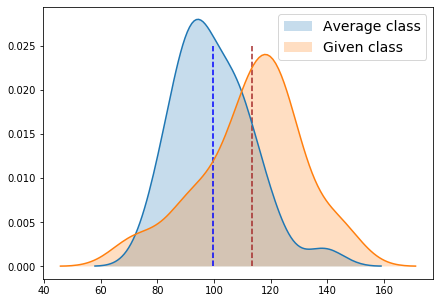

In [7]:
plt.figure(figsize=(7,5))
sns.kdeplot(avg_class,shade=True)
sns.kdeplot(given_class,shade=True)
plt.legend(['Average class','Given class'],fontsize=14)
plt.vlines(x=avg_class.mean(),ymin=0,ymax=0.025,color='blue',linestyle='--')
plt.vlines(x=given_class.mean(),ymin=0,ymax=0.025,color='brown',linestyle='--')
plt.show()

In [8]:
std_err = population_std/np.sqrt(n_sample)
z_stat = (given_class.mean()-population_mean)/std_err

print("Standard error of the mean:",std_err)
print("Z-statistic:",z_stat)

Standard error of the mean: 2.7386127875258306
Z-statistic: 4.844301730823469


In [9]:
alpha = 0.05
rejection_threshold = st.norm.ppf(1-alpha)

In [10]:
if z_stat>rejection_threshold:
    print("We reject the NULL hypothesis. The class I.Q. is indeed above average")
else:
    print("We cannot reject the NULL hypothesis that class average is same as population average.")

We reject the NULL hypothesis. The class I.Q. is indeed above average


In [11]:
def hypothesis_testing(n_sample=30,population_mean=100,population_std=15,alpha=0.05):
    """
    Tests the hypothesis of above average I.Q. and reports the conclusion
    """
    given_class=np.vectorize(int)(np.random.normal(loc=112.5,scale=population_std,size=n_sample))
    
    std_err = population_std/np.sqrt(n_sample)
    z_stat = (given_class.mean()-population_mean)/std_err

    alpha = 0.05
    rejection_threshold = st.norm.ppf(1-alpha)
    
    if z_stat>rejection_threshold:
        print("We reject the NULL hypothesis. The class I.Q. is indeed above average")
    else:
        print("We cannot reject the NULL hypothesis that class average is same as population average.")

### Test with default values

In [12]:
hypothesis_testing()

We reject the NULL hypothesis. The class I.Q. is indeed above average


### What if the population mean is higher 110?

In [13]:
hypothesis_testing(population_mean=107)

We cannot reject the NULL hypothesis that class average is same as population average.


### What if the population standard deviation is lower, say 10? What happens if it is higher instead?

In [14]:
hypothesis_testing(population_std=10)

We reject the NULL hypothesis. The class I.Q. is indeed above average


In [15]:
hypothesis_testing(population_std=40)

We cannot reject the NULL hypothesis that class average is same as population average.


### What if there were only 4 high-school students? What if we could test 100 students instead?

In [16]:
hypothesis_testing(n_sample=4)

We cannot reject the NULL hypothesis that class average is same as population average.


In [17]:
hypothesis_testing(n_sample=100)

We reject the NULL hypothesis. The class I.Q. is indeed above average


### What is the impact of changing the significance level to 0.01 (or even 0.001) from 0.05?

In [18]:
hypothesis_testing(alpha=0.01)

We reject the NULL hypothesis. The class I.Q. is indeed above average


In [19]:
hypothesis_testing(alpha=0.001)

We reject the NULL hypothesis. The class I.Q. is indeed above average


---

## Independent Student's t-test implementation

The Student’s t-Test is a statistical hypothesis test for testing whether two samples are expected to have been drawn from the same population.

It is named for the pseudonym “Student” used by [William Gosset](https://en.wikipedia.org/wiki/William_Sealy_Gosset), who developed the test.

The test works by checking the means from two samples to see if they are significantly different from each other. It does this by calculating the standard error in the difference between means, which can be interpreted to see how likely the difference is, if the two samples have the same mean (the null hypothesis).

The t-statistic calculated by the test can be interpreted by comparing it to critical values from the [t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution). The critical value can be calculated using the degrees of freedom and a significance level with the percent point function (PPF).

We can interpret the statistic value in a two-tailed test, meaning that if we reject the null hypothesis, it could be because the first mean is smaller or greater than the second mean.

### A custom function

In [20]:
def independent_ttest(data1, data2, alpha=0.05):
    """
    Student's t-test for independent groups
    
    Argument:
        data1: First group data in numpy array format
        data2: Second group two data in numpy array format
        alpha: Significance level
    
    Returns:
        t_stat: Computed t-statistic
        df: Degrees of freedom
        cv: Critical value
        p: p-value (of NULL hypothesis)
    """
    import scipy.stats as st
    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
    # calculate standard errors
    se1, se2 = st.sem(data1), st.sem(data2)
    # standard error on the difference between the samples
    sed = np.sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = st.t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - st.t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

### Apply the function for testing hypothesis of equal mean

In [21]:
n_sample = 20

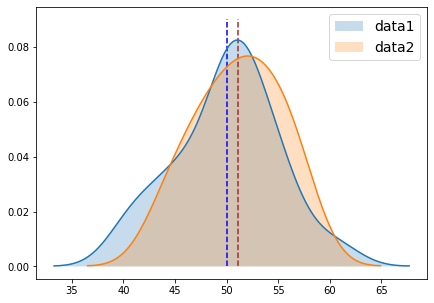

In [22]:
data1 = 5 * np.random.randn(n_sample) + 50
data2 = 5 * np.random.randn(n_sample) + 51

plt.figure(figsize=(7,5))
sns.kdeplot(data1,shade=True)
sns.kdeplot(data2,shade=True)
plt.legend(['data1','data2'],fontsize=14)
plt.vlines(x=data1.mean(),ymin=0,ymax=0.09,color='blue',linestyle='--')
plt.vlines(x=data2.mean(),ymin=0,ymax=0.09,color='brown',linestyle='--')
plt.show()

In [23]:
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
print()

# interpret via critical value
if abs(t_stat) <= cv:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=-0.780, df=38, cv=1.686, p=0.440

Fail to reject null hypothesis that the means are equal.
Fail to reject null hypothesis that the means are equal.


### More numner of sample, more _statistical power_!

The power of a binary hypothesis test is the probability that the test rejects the null hypothesis ($H_0$) when a specific alternative hypothesis ($H_a$) is true. 

The statistical power ranges from 0 to 1, and **as statistical power increases, the probability of making a type II error (wrongly failing to reject the null hypothesis) decreases**. For a type II error probability of $\beta$, the corresponding statistical power is 1 − $\beta$. 

For example, if experiment 1 has a statistical power of 0.7, and experiment 2 has a statistical power of 0.95, then there is a stronger probability that experiment 1 had a type II error than experiment 2, and experiment 2 is more reliable than experiment 1 due to the reduction in probability of a type II error. 

It can be equivalently thought of as the probability of accepting the alternative hypothesis ($H_a$) when it is true—that is, the **ability of a test to detect a specific effect**, if that specific effect actually exists.

In [24]:
n_sample = 200

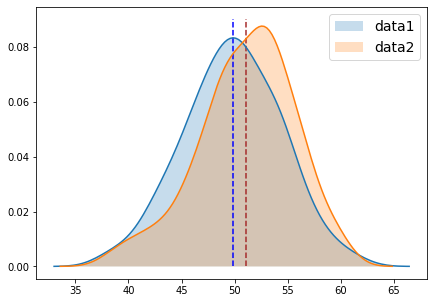

In [25]:
data1 = 5 * np.random.randn(n_sample) + 50
data2 = 5 * np.random.randn(n_sample) + 51

plt.figure(figsize=(7,5)
          )
sns.kdeplot(data1,shade=True)
sns.kdeplot(data2,shade=True)
plt.legend(['data1','data2'],fontsize=14)
plt.vlines(x=data1.mean(),ymin=0,ymax=0.09,color='blue',linestyle='--')
plt.vlines(x=data2.mean(),ymin=0,ymax=0.09,color='brown',linestyle='--')
plt.show()

In [26]:
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
print()

# interpret via critical value
if abs(t_stat) <= cv:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=-2.858, df=398, cv=1.649, p=0.004

Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


---

## ANOVA using Scipy (`f_oneway()` method)

In [27]:
n_sample = 50

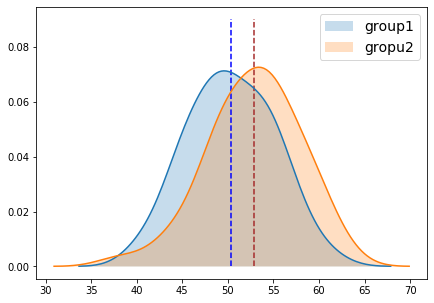

In [28]:
group1 = 5 * np.random.randn(n_sample) + 50
group2 = 5 * np.random.randn(n_sample) + 52

plt.figure(figsize=(7,5)
          )
sns.kdeplot(group1,shade=True)
sns.kdeplot(group2,shade=True)
plt.legend(['group1','gropu2'],fontsize=14)
plt.vlines(x=group1.mean(),ymin=0,ymax=0.09,color='blue',linestyle='--')
plt.vlines(x=group2.mean(),ymin=0,ymax=0.09,color='brown',linestyle='--')
plt.show()

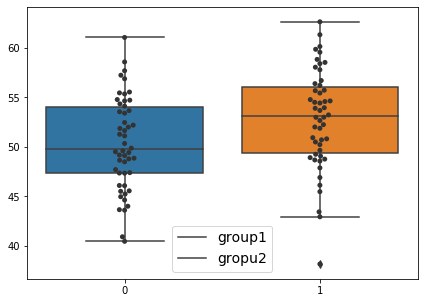

In [29]:
plt.figure(figsize=(7,5))
sns.boxplot(data=[group1,group2])
sns.swarmplot(data=[group1,group2],color='.2')
plt.legend(['group1','gropu2'],fontsize=14)
plt.show()

In [30]:
f,p=st.f_oneway(group1,group2)

In [31]:
print("The F-statistic obtained running ANOVA on the data groups:",f)
print("The p-value of the ANOVA test:",p)
if p>0.05:
    print("\nANOVA fails to reject the hypothesis of equal mean")
else:
    print("\nWe reject the hypothesis of equal mean as per ANOVA test result")

The F-statistic obtained running ANOVA on the data groups: 6.594206103395201
The p-value of the ANOVA test: 0.011741263190136573

We reject the hypothesis of equal mean as per ANOVA test result


### For multiple groups, two-way pair comparisons are done

In [32]:
def multi_anova(groups,alpha=0.05):
    """
    Two-way ANOVA between multiple groups
    groups: A dictionary object of trial groups
    """
    from itertools import combinations
    list_anova = list(combinations(list(groups.keys()),2))
    
    for comb in list_anova:
        _,p=st.f_oneway(groups[comb[0]],groups[comb[1]])
        if p>0.05:
            print("\nANOVA fails to reject the hypothesis of equal mean for {} and {}".format(comb[0],comb[1]))
        else:
            print("\nWe reject the hypothesis of equal mean for {} and {} as per ANOVA test result".format(comb[0],comb[1]))

### Imaginary drug trial

Let's suppose we have three versions of a blood pressure medicine developed - 'A','B','C'.

We give this medicine to four groups - three trial groups and one control group, whose participants were given placebo (being a blind experiment, they did not know). There were total 155 participants and due to some logistic reason, the divisions were slightly uneven.

No problem, ANOVA can handle slight difference in the sample count among groups!

As a data scientist, you have been asked to analyze the clinical trial data and recommend whether to go ahead with further development on any (or more than one) of these drugs.

Since they all the variations of same fundamental molecule, their impact is not drastically different and depending on trial participants physiology, there are lot of variations among the trial groups.

Let's put our `multi_anova` function to use for this imaginary study!

In [38]:
trial_A = 9*np.random.randn(34) + 102
trial_B = 6*np.random.randn(48) + 109
trial_C = 12*np.random.randn(38) + 103
trial_CONTROL = 10*np.random.randn(35) + 110

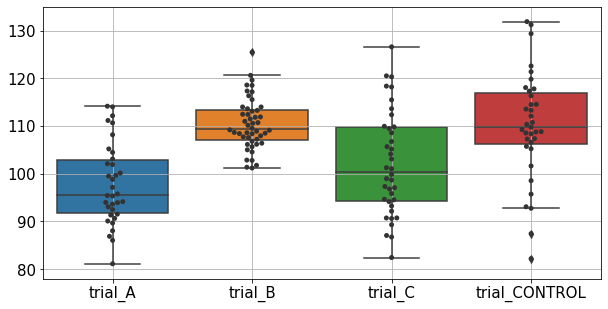

In [48]:
plt.figure(figsize=(10,5))
ax=sns.boxplot(data=[trial_A,trial_B,trial_C,trial_CONTROL])
ax=sns.swarmplot(data=[trial_A,trial_B,trial_C,trial_CONTROL],color='.2')
ax.set_xticklabels(['trial_A','trial_B','trial_C','trial_CONTROL'],fontsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

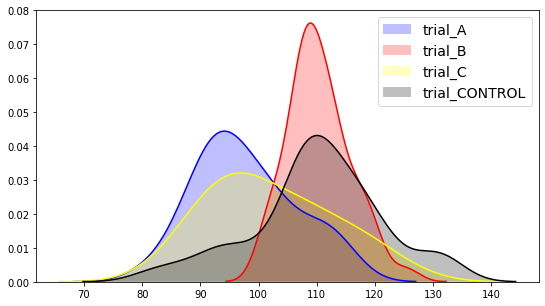

In [40]:
plt.figure(figsize=(9,5))
sns.kdeplot(trial_A,shade=True,color='Blue')
sns.kdeplot(trial_B,shade=True,color='red')
sns.kdeplot(trial_C,shade=True,color='yellow')
sns.kdeplot(trial_CONTROL,shade=True,color='black')
plt.legend(['trial_A','trial_B','trial_C','trial_CONTROL'],fontsize=14)
plt.show()

In [41]:
groups = {'trial_A':trial_A,'trial_B':trial_B,'trial_C':trial_C,'trial_CONTROL':trial_CONTROL}

In [42]:
multi_anova(groups)


We reject the hypothesis of equal mean for trial_A and trial_B as per ANOVA test result

ANOVA fails to reject the hypothesis of equal mean for trial_A and trial_C

We reject the hypothesis of equal mean for trial_A and trial_CONTROL as per ANOVA test result

We reject the hypothesis of equal mean for trial_B and trial_C as per ANOVA test result

ANOVA fails to reject the hypothesis of equal mean for trial_B and trial_CONTROL

We reject the hypothesis of equal mean for trial_C and trial_CONTROL as per ANOVA test result


### What's the conclusion?

From the results, printed out, we see that equal mean hypothesis (with CONTROL group) could not be rejected for trial_B, whereas the hypothesis was rejected for the cases - trial_A and trial_CONTROL, trial_B and trial_CONTROL.

Therefore, the trials of medicine A and medicine C showed statistically significant lowering of blood pressure whereas medicine B did not.